In [23]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# load data
crosswalks = pd.read_csv("crosswalks_and_neighborhoods.csv", 
                                       index_col="_id") # use the column named _id as the row index
population = pd.read_csv("Pittsburgh_2015_census_data.csv", index_col="_id")

In [6]:
crosswalks.head(10)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,
1,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
2,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
3,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
4,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
5,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267
6,768755224,Crosswalk - Two Lined,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443852,-79.939028
7,1308677189,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443965,-79.938673
8,1159710354,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.445632,-79.931342
9,216672403,Crosswalk - Continental,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-9,40.444583,-79.945557


In [7]:
population.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
_id,,,,
1,Allegheny Center,1,1411.0,196.000000
2,Allegheny West,2,343.0,96.000000
3,Allentown,3,2558.0,449.773276
4,Arlington,4,1852.0,348.188168
5,Arlington Heights,5,272.0,126.000000
6,Banksville,6,3858.0,581.107563
7,Bedford Dwellings,7,1349.0,180.000000
8,Beechview,8,8078.0,719.658252
9,Beltzhoover,9,1702.0,343.072879


In [9]:
cross_dict = {} #total number of crosswalks for each neighborhood
cross_types_dict = {} #total number of each type of crosswalk
two_dict = {}
cont_dict = {}
ladd_dict = {}
bricks_dict = {} #total number of brick crosswalks for each neighborhood

for index, row in crosswalks.iterrows():
    neigh_name = row["neighborhood"]
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (neigh_name not in cross_dict):
        cross_dict[neigh_name] = 1
        # if the crosswalk found is two lined, adds it to the two lined dictionary (key=neighborhood, value=quantity)
        if ("Two Lined" in cross_name):
            two_dict[neigh_name] = 1
        # if the crosswalk found is continental, adds it to the continental dictionary (key=neighborhood, value=quantity)
        elif ("Continental" in cross_name):
            cont_dict[neigh_name] = 1
        # if the crosswalk found is ladder, adds it to the ladder dictionary (key=neighborhood, value=quantity)
        elif ("Ladder" in cross_name):
            ladd_dict[neigh_name] = 1
        # if the crosswalk found is brick, adds it to the bricks dictionary (key=neighborhood, value=quantity)
        elif ("Brick" in cross_name):
            bricks_dict[neigh_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (neigh_name in cross_dict):
        cross_dict[neigh_name] += 1
        # if the crosswalk found is two lined, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        if ("Two Lined" in cross_name):
            if (neigh_name not in two_dict):
                two_dict[neigh_name] = 1
            elif (neigh_name in two_dict):
                two_dict[neigh_name] += 1
        # if the crosswalk found is continental, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        elif ("Continental" in cross_name):
            if (neigh_name not in cont_dict):
                cont_dict[neigh_name] = 1
            elif (neigh_name in cont_dict):
                cont_dict[neigh_name] += 1
        # if the crosswalk found is ladder, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        elif ("Ladder" in cross_name):
            if (neigh_name not in ladd_dict):
                ladd_dict[neigh_name] = 1
            elif (neigh_name in ladd_dict):
                ladd_dict[neigh_name] += 1
        # if the crosswalk found is brick, adds 1 to the bricks dictionary (key=neighborhood, value=quantity)
        elif ("Brick" in cross_name):
            if (neigh_name not in bricks_dict):
                bricks_dict[neigh_name] = 1
            elif (neigh_name in bricks_dict):
                bricks_dict[neigh_name] += 1

# finds how many times each type of crosswalk appears
for index, row in crosswalks.iterrows():
    cross_name = row["type"]
    
    # if the neighborhood is not in the dictionary, set it equal to 1
    if (cross_name not in cross_types_dict):
        cross_types_dict[cross_name] = 1
    # else, if the item already exists in the dictionary add 1
    elif (cross_name in cross_types_dict):
        cross_types_dict[cross_name] += 1
        
print("Total # of crosswalks for each neighborhood \n-----")      
print(cross_dict)
print("\nTotal # of each type of crosswalk \n-----")
print(cross_types_dict)

Total # of crosswalks for each neighborhood 
-----
{'Central Business District': 402, 'Strip District': 114, 'Morningside': 33, 'Squirrel Hill North': 112, 'Squirrel Hill South': 239, 'Shadyside': 190, 'Polish Hill': 29, 'North Oakland': 125, 'West Oakland': 41, 'Central Oakland': 113, 'East Liberty': 146, 'Bloomfield': 192, 'South Oakland': 66, 'Stanton Heights': 22, 'Terrace Village': 67, 'Highland Park': 64, 'Bluff': 82, 'Lincoln-Lemington-Belmar': 29, 'Lincoln Place': 15, 'Lower Lawrenceville': 40, 'Crawford-Roberts': 63, 'Middle Hill': 59, 'Bedford Dwellings': 8, 'Upper Hill': 21, 'Point Breeze': 91, 'Larimer': 58, 'Point Breeze North': 53, 'Homewood West': 20, 'Homewood North': 40, 'Homewood South': 81, 'East Hills': 21, nan: 14, 'Friendship': 37, 'Regent Square': 15, 'South Side Flats': 262, 'South Shore': 15, 'Swisshelm Park': 7, 'Greenfield': 68, 'Hazelwood': 68, 'Glen Hazel': 7, 'Elliott': 25, 'Hays': 7, 'Esplen': 15, 'New Homestead': 1, 'Central Lawrenceville': 81, 'West End

In [11]:
# finds the number of people per crosswalk in each neighborhood
census_dict = {}
ppl_per_crosswalk = {}

for index, row in population.iterrows():
    neigh_name = row["Neighborhood"]
    estimate = row["Estimate; Total"]
    
    census_dict[neigh_name] = estimate
    if (neigh_name in cross_dict):
        ppl_per_crosswalk[neigh_name] = estimate / cross_dict[neigh_name]

print("Total population estimates for each neighborhood \n-----")
print(census_dict)

Total population estimates for each neighborhood 
-----
{'Allegheny Center': 1411.0, 'Allegheny West': 343.0, 'Allentown': 2558.0, 'Arlington': 1852.0, 'Arlington Heights': 272.0, 'Banksville': 3858.0, 'Bedford Dwellings': 1349.0, 'Beechview': 8078.0, 'Beltzhoover': 1702.0, 'Bloomfield': 8669.0, 'Bluff': 6294.0, 'Bon Air': 920.0, 'Brighton Heights': 7421.0, 'Brookline': 13160.0, 'California-Kirkbride': 803.0, 'Carrick': 10122.0, 'Central Business District': 4060.0, 'Central Lawrenceville': 4775.0, 'Central Northside': 2892.0, 'Central Oakland': 5822.0, 'Chartiers City': 560.0, 'Chateau': 3.0, 'Crafton Heights': 3964.0, 'Crawford-Roberts': 2225.0, 'Duquesne Heights': 2522.0, 'East Allegheny': 2095.0, 'East Carnegie': 610.0, 'East Hills': 2859.0, 'East Liberty': 5537.0, 'Elliott': 2491.0, 'Esplen': 309.0, 'Fairywood': 1181.0, 'Fineview': 1270.0, 'Friendship': 1840.0, 'Garfield': 3966.0, 'Glen Hazel': 716.0, 'Greenfield': 7690.0, 'Hays': 405.0, 'Hazelwood': 4257.0, 'Highland Park': 6810.0

In [53]:
# "other" is ignored because we don't know what kinds of crosswalks they are and there also aren't that many
#total_cross =  #total number of crosswalks overall
#prop_cross = {}
prop_dict_two = {}
prop_dict_cont = {}
prop_dict_ladd = {}
prop_dict_bricks = {}

# proportion of each neighborhoods two-lined to total crosswalks
for cr in two_dict:
    prop_dict_two[cr] = two_dict[cr] / cross_dict[cr]

# proportion of each neighborhoods continental to total crosswalks
for cr in cont_dict:
    prop_dict_cont[cr] = cont_dict[cr] / cross_dict[cr]

# proportion of each neighborhoods ladder to total crosswalks
for cr in ladd_dict:
    prop_dict_ladd[cr] = ladd_dict[cr] / cross_dict[cr]

# proportion of each neighborhoods brick to total crosswalks
prop_dict_bricks["Central Business District"] = bricks_dict["Central Business District"] / cross_dict["Central Business District"]
prop_dict_bricks["North Shore"] = bricks_dict["North Shore"] / cross_dict["North Shore"]
prop_dict_bricks["Chateau"] = bricks_dict["Chateau"] / cross_dict["Chateau"]
prop_dict_bricks["South Side Flats"] = bricks_dict["South Side Flats"] / cross_dict["South Side Flats"]

#print("Proportion of two-lined crosswalks for each neighborhood \n-----")
#print(prop_dict_two)
#print("\nProportion of continental crosswalks for each neighborhood \n-----")
#print(prop_dict_cont)
#print("\nProportion of ladder crosswalks for each neighborhood \n-----")
#print(prop_dict_ladd)
#print("\nProportion of brick crosswalks for each neighborhood (0 is omitted) \n-----")
#print(prop_dict_bricks)

In [13]:
print("Number of people per crosswalk for each neighborhood \n-----")
print(ppl_per_crosswalk)

Number of people per crosswalk for each neighborhood 
-----
{'Allegheny Center': 34.41463414634146, 'Allegheny West': 13.192307692307692, 'Allentown': 106.58333333333333, 'Arlington': 142.46153846153845, 'Banksville': 241.125, 'Bedford Dwellings': 168.625, 'Beechview': 117.07246376811594, 'Beltzhoover': 53.1875, 'Bloomfield': 45.151041666666664, 'Bluff': 76.7560975609756, 'Bon Air': 76.66666666666667, 'Brighton Heights': 119.69354838709677, 'Brookline': 153.02325581395348, 'California-Kirkbride': 53.53333333333333, 'Carrick': 138.65753424657535, 'Central Business District': 10.099502487562189, 'Central Lawrenceville': 58.95061728395062, 'Central Northside': 64.26666666666667, 'Central Oakland': 51.52212389380531, 'Chartiers City': 560.0, 'Chateau': 0.10344827586206896, 'Crafton Heights': 233.1764705882353, 'Crawford-Roberts': 35.317460317460316, 'Duquesne Heights': 105.08333333333333, 'East Allegheny': 34.916666666666664, 'East Hills': 136.14285714285714, 'East Liberty': 37.92465753424

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

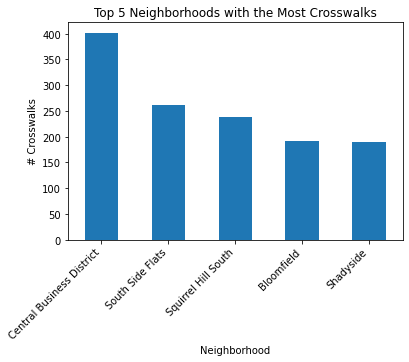

In [48]:
df_num_cross = pd.Series(cross_dict).sort_values(ascending=False)

# bar graphs of the five neighborhoods with the most crosswalks and the five with the least (# cw/total cw)
cross_plot = df_num_cross.head(5)
cross_plot.plot(kind='bar')
plt.title('Top 5 Neighborhoods with the Most Crosswalks')
plt.xlabel('Neighborhood')
plt.ylabel('# Crosswalks')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

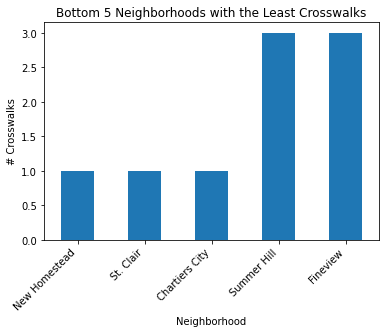

In [49]:
# bar graphs of the five neighborhoods with the most crosswalks and the five with the least (# cw/total cw)
cross_plot = df_num_cross.sort_values(ascending=True).head(5)
cross_plot.plot(kind='bar')
plt.title('Bottom 5 Neighborhoods with the Least Crosswalks')
plt.xlabel('Neighborhood')
plt.ylabel('# Crosswalks')
plt.xticks(rotation=45, ha='right')

In [52]:
# pie chart breakdown of different crosswalk types (%)
#df_num_crosswalks = pd.DataFrame(cross_plot).reset_index()
#df_num_crosswalks.columns = ['Neighborhood', '# People per Crosswalk']

#df_num_crosswalks["Neighborhood"].value_counts().sort_index().plot.pie(y='Neighborhood', 
                                                  #subplots=False, 
                                                  #figsize=(8, 4))

In [58]:
# weighted values based on crosswalk type (brick=1, two-line=2, continental/ladder=3)
# Formula (for each neighborhood): proportion of crosswalk type * weighted values
#weighted = {}

#for n in cross_dict:
#    if (n in prop_dict_two):
#        weighted[n] += prop_dict_two[n]*2
#    elif (n in prop_dict_cont):
#        weighted[n] += prop_dict_cont[n]*3
#    elif (n in prop_dict_ladd):
#        weighted[n] += prop_dict_ladd[n]*3
#    elif (n in prop_dict_bricks):
#        weighted[n] += prop_dict_bricks[n]*1


In [ ]:
# crosswalk type breakdown of the neighborhoods with the highest score
#df_weighted_cross = pd.Series(weighted).sort_values(ascending=False)

#cross_plot = df_weighted_cross.sort_values(ascending=True).head(5)
#cross_plot.plot(kind='bar')
#plt.title('Bottom 5 Neighborhoods with the Least Crosswalks')
#plt.xlabel('Neighborhood')
#plt.ylabel('# Crosswalks')
#plt.xticks(rotation=45, ha='right')

In [9]:
#creates a series for each neighborhood with # people per crosswalk
num_per_cross = pd.Series(ppl_per_crosswalk)
num_per_cross

Allegheny Center        34.414634
Allegheny West          13.192308
Allentown              106.583333
Arlington              142.461538
Banksville             241.125000
                          ...    
Upper Lawrenceville     81.000000
West End                 9.791667
West Oakland            41.878049
Westwood               321.545455
Windgap                139.454545
Length: 88, dtype: float64

In [10]:
# Turning the Series into a DataFrame with column names
cr_df = pd.DataFrame(num_per_cross).reset_index()
cr_df.columns = ['Neighborhood', '# People per Crosswalk']
cr_df

,Neighborhood,# People per Crosswalk
0,Allegheny Center,34.414634
1,Allegheny West,13.192308
2,Allentown,106.583333
3,Arlington,142.461538
4,Banksville,241.125000
...,...,...
83,Upper Lawrenceville,81.000000
84,West End,9.791667
85,West Oakland,41.878049
86,Westwood,321.545455


In [11]:
# Turning the DataFrame back into a series to plot it on the map
num_per_cross = cr_df.groupby("Neighborhood").sum()['# People per Crosswalk']
num_per_cross.sort_values(ascending=False)

Neighborhood
New Homestead           973.000000
Chartiers City          560.000000
Mount Oliver Borough    424.875000
Fineview                423.333333
Summer Hill             397.000000
                           ...    
West End                  9.791667
Strip District            6.552632
North Shore               2.733333
South Shore               0.800000
Chateau                   0.103448
Name: # People per Crosswalk, Length: 88, dtype: float64

* If there are less people per crosswalk, that likely means that the people there have more access to crosswalks
* For the neighborhoods with numbers less than 1, that means that there are more crosswalks than there are people
* If the proportion of people to crosswalks is smaller, it's likely that the area is also more walkable and that more attention is paid to pedestrian safety

In [23]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot() # plot the geopandas dataframe

In [21]:
# do the merge
crosswalks_map = neighborhoods.merge(num_per_cross, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
crosswalks_map[['hood','# People per Crosswalk','geometry']].head()

# merge and table without New Homestead
cr_without_nh = num_per_cross.drop('New Homestead') #series without New Homestead
cross_without_nh_map = neighborhoods.merge(cr_without_nh, how='left', left_on='hood', right_on='Neighborhood')
#cross_without_nh_map[['hood','# People per Crosswalk','geometry']].head()

In [22]:
# draw a choropleth map using data from the column named "# People per Crosswalk"
#crosswalks_map.plot(column='# People per Crosswalk')

# choropleth map but without New Homestead
#cross_without_nh_map.plot(column='# People per Crosswalk')

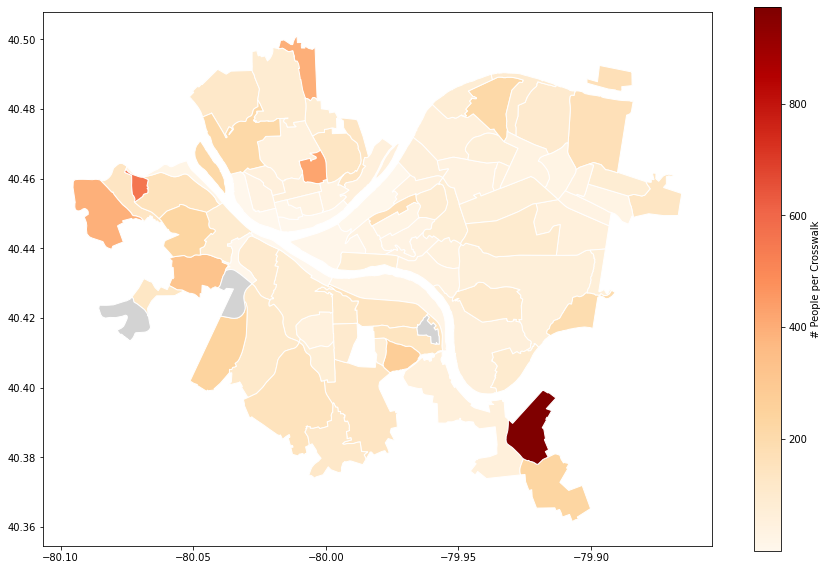

In [18]:
# all neighborhoods plotted
crosswalks_map.plot(column='# People per Crosswalk', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "# People per Crosswalk"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

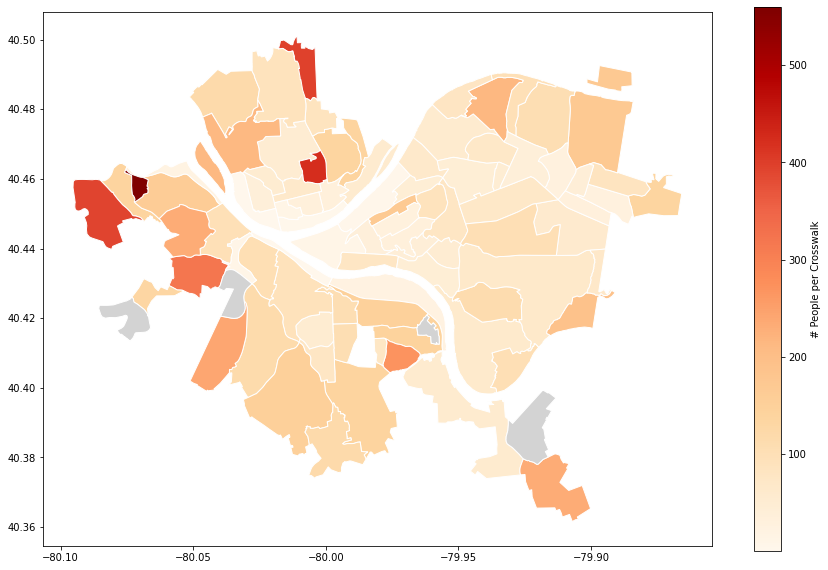

In [19]:
# neighborhoods plotted without New Homestead
cross_without_nh_map.plot(column='# People per Crosswalk', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "# People per Crosswalk"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [ ]:
# average rankings based on two things above


**Conclusion**


* One aspect that hasn't been considered is how different types of streetlights and the presence of pedestrian traffic signals may affect how safe the neighborhood is for them
* Missing census data for Arlington Heights, Ridgemont, and East Carnegie
